### Agenda :- Apply SVC practical implementation

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [22]:
df.shape

(768, 9)

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Insulin', ylabel='Density'>

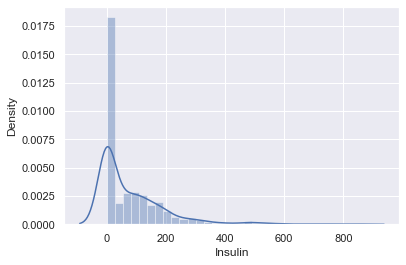

In [7]:
sns.distplot(df['Insulin'])

In [8]:
# df['Insulin'] can not be a 0

In [9]:
df['Insulin'] = np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])

C:\Users\Ramdas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='SkinThickness', ylabel='Density'>

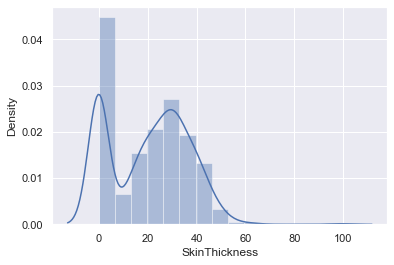

In [10]:
sns.distplot(df['SkinThickness'])

In [11]:
df['SkinThickness'] = np.where(df['SkinThickness']==0,df['SkinThickness'].mean(),df['SkinThickness'])

In [12]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
## feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaled_X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)


In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

The Accuracy of model is 0.7402597402597403
Report is                precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.66      0.56      0.61        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



<AxesSubplot: >

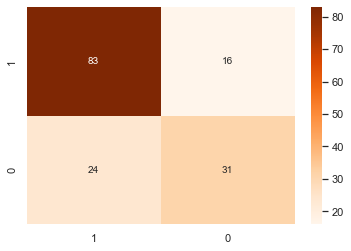

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('The Accuracy of model is {}'.format(accuracy_score(y_test,y_pred)))
print('Report is ',classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cmap ='Oranges' ,annot=True,xticklabels=[1, 0],yticklabels = [1, 0])

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.5,1,2,3],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[0.5,2,3]
             }
grid_search = GridSearchCV(svc, param_grid=parameters,cv=5)

In [26]:
grid_search.fit(X,y)

C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ramdas\anaconda3\lib\site-packages

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2, 3], 'degree': [0.5, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [27]:
print(grid_search.best_score_)
print(grid_search.best_params_)


0.7708768355827178
{'C': 0.5, 'degree': 2, 'kernel': 'linear'}
